# 绘制各类别准确率评估指标柱状图

同济子豪兄：https://space.bilibili.com/1900783

## 设置Matplotlib中文字体

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

In [2]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [3]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [4]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
# !rm -rf /home/featurize/.cache/matplotlib

# import matplotlib
# matplotlib.rc("font",family='SimHei') # 中文字体

--2023-03-26 18:30:42--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 10050868 (9.6M) [application/x-font-ttf]
正在保存至: “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf”

/environment/minico 100%[===================>]   9.58M  19.7MB/s    用时 0.5s    

2023-03-26 18:30:43 (19.7 MB/s) - 已保存 “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf” [10050868/10050868])



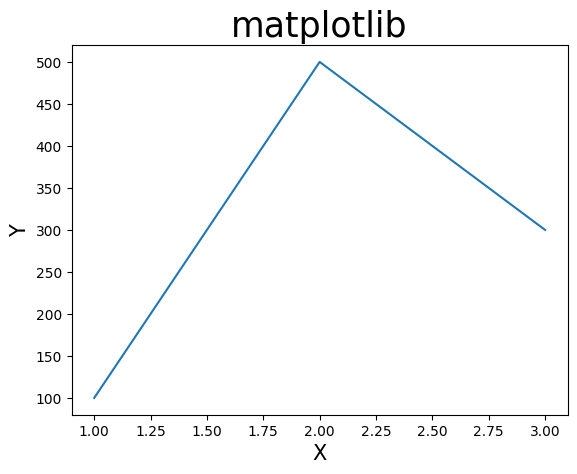

In [2]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib', fontsize=25)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.show()

## 导入工具包

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 导入各类别准确率评估指标表格

In [4]:
df = pd.read_csv('各类别准确率评估指标.csv')

In [5]:
df

,类别,precision,recall,f1-score,support,accuracy,AP,AUC
0,Angular,0.439024,0.486486,0.461538,37.0,0.486486,0.432873,0.784168
1,Rounded,0.454545,0.322581,0.377358,31.0,0.322581,0.336043,0.792181
2,Subangular,0.546875,0.530303,0.538462,66.0,0.530303,0.535738,0.776973
3,Subrounded,0.522727,0.666667,0.585987,69.0,0.666667,0.574630,0.785928
4,Very angular,0.521739,0.387097,0.444444,31.0,0.387097,0.564448,0.877657
5,Well rounded,0.500000,0.357143,0.416667,14.0,0.357143,0.396094,0.886752
6,macro avg,0.497485,0.458379,0.470743,248.0,0.458379,0.473304,0.817277
7,weighted avg,0.506737,0.508065,0.501442,248.0,0.508065,0.501956,0.801222


## 选择评估指标

In [19]:
# feature = 'precision'
# feature = 'recall'
# feature = 'f1-score'
# feature = 'accuracy'
# feature = 'AP'
feature = 'AUC'

## 绘制柱状图

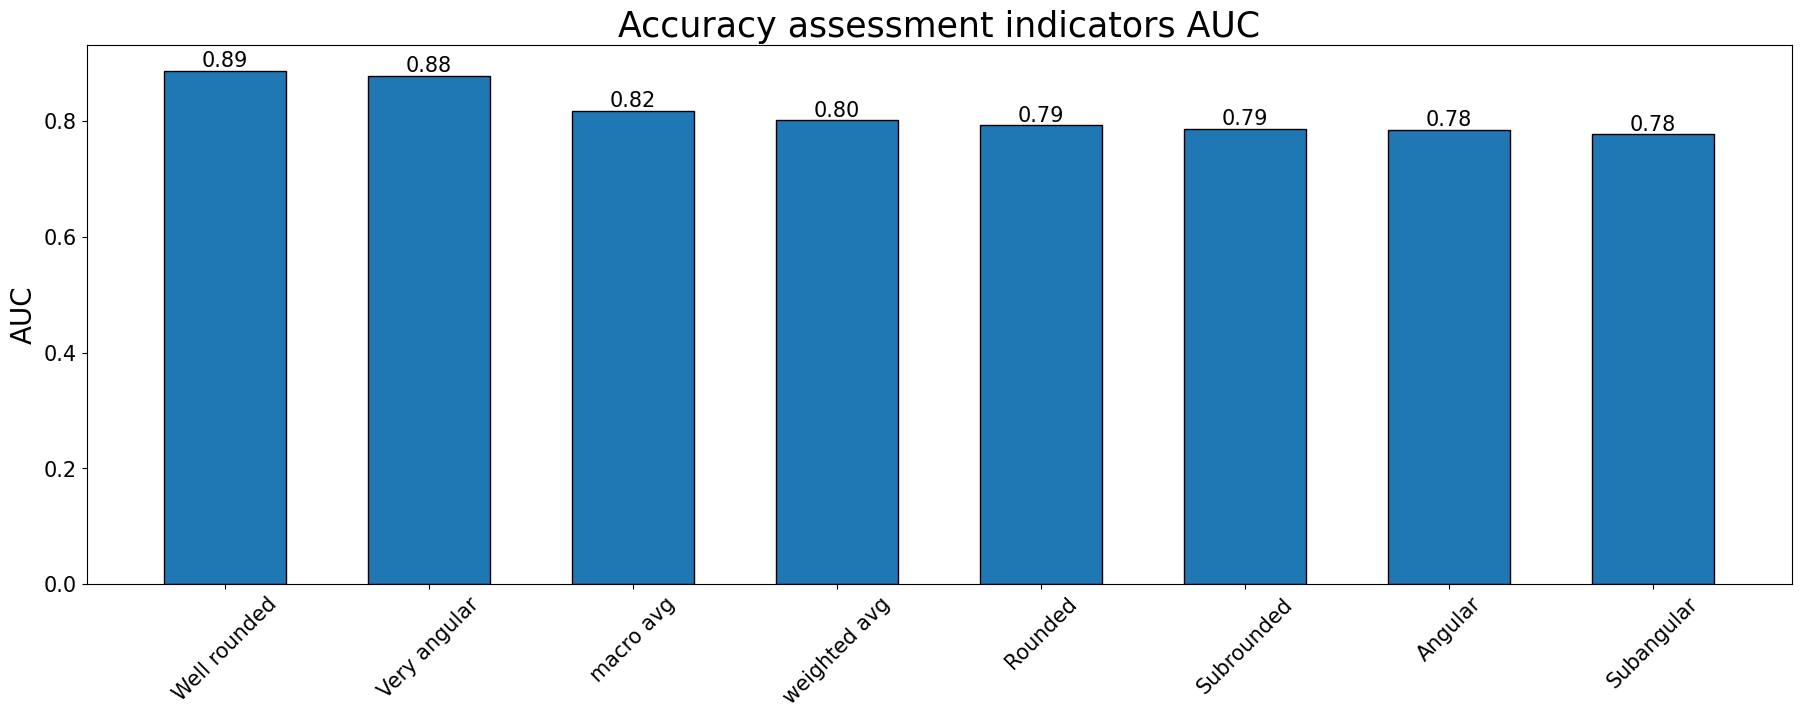

In [20]:
df_plot = df.sort_values(by=feature, ascending=False)

plt.figure(figsize=(22, 7))

x = df_plot['类别']
y = df_plot[feature]

ax = plt.bar(x, y, width=0.6, facecolor='#1f77b4', edgecolor='k')
plt.bar_label(ax, fmt='%.2f', fontsize=15) # 置信度数值

plt.xticks(rotation=45)
plt.tick_params(labelsize=15)
# plt.xlabel('类别', fontsize=20)
plt.ylabel(feature, fontsize=20)
plt.title('Accuracy assessment indicators {}'.format(feature), fontsize=25)

plt.savefig('各类别准确率评估指标柱状图-{}.pdf'.format(feature), dpi=120, bbox_inches='tight')

plt.show()